In [1]:
pip install seaborn #Installation of Seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing all the packages, machine learning models and Evaluation metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score







In [4]:
df=pd.read_csv("Cyberthreat_data.csv")
df

,frame_number,frame_time,frame_len,eth_src,eth_dst,ip_src,ip_dst,ip_proto,ip_len,tcp_len,tcp_srcport,tcp_dstport,Value,normality
0,1,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,49279.0,80,-99.0,0
1,2,1.237230e+14,62,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,48.0,0.0,56521.0,80,-99.0,0
2,3,1.237230e+14,62,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,48.0,0.0,80.0,56521,-99.0,0
3,4,1.237230e+14,54,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,40.0,0.0,80.0,49279,-99.0,0
4,5,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,56521.0,80,-99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477421,87181,1.284140e+14,42,1.672760e+14,8.797200e+13,0.000000e+00,0.000000e+00,-1,0.0,0.0,0.0,0,-5.0,5
477422,69378,1.271670e+14,42,1.672760e+14,8.797200e+13,0.000000e+00,0.000000e+00,-1,0.0,0.0,0.0,0,-5.0,5
477423,81928,1.268000e+14,42,1.672760e+14,8.797200e+13,0.000000e+00,0.000000e+00,-1,0.0,0.0,0.0,0,-5.0,5
477424,37052,1.249020e+14,42,1.672760e+14,8.797200e+13,0.000000e+00,0.000000e+00,-1,0.0,0.0,0.0,0,-5.0,5


In [6]:
df.isna().sum # Checks for "Nan" values

<bound method DataFrame.sum of         frame_number  frame_time  frame_len  eth_src  eth_dst  ip_src  ip_dst  \
0              False       False      False    False    False   False   False   
1              False       False      False    False    False   False   False   
2              False       False      False    False    False   False   False   
3              False       False      False    False    False   False   False   
4              False       False      False    False    False   False   False   
...              ...         ...        ...      ...      ...     ...     ...   
477421         False       False      False    False    False   False   False   
477422         False       False      False    False    False   False   False   
477423         False       False      False    False    False   False   False   
477424         False       False      False    False    False   False   False   
477425         False       False      False    False    False   False   False 

In [9]:
fn=pd.crosstab(df.frame_number,df.normality)
fn                                           #crosstab for comparing the frame_number with the Target column (Normality)

normality,0,1,2,3,4,5
frame_number,,,,,,
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
...,...,...,...,...,...,...
125154,0,0,1,0,0,0
125155,0,0,1,0,0,0
125156,0,0,1,0,0,0


In [10]:
ft=pd.crosstab(df.frame_time,df.normality)
ft                                          #crosstab for comparing the frame_time with the Target column (Normality)

normality,0,1,2,3,4,5
frame_time,,,,,,
1.237230e+14,58,80,0,0,0,0
1.237240e+14,77,88,0,0,0,0
1.237250e+14,76,95,0,0,0,0
1.237260e+14,67,95,0,0,0,0
1.237270e+14,51,62,0,0,0,0
...,...,...,...,...,...,...
1.305100e+14,6,0,44,0,0,0
1.305110e+14,0,0,42,0,0,0
1.305120e+14,5,0,42,0,0,0


In [11]:
es=pd.crosstab(df.eth_src,df.normality)
es                                         #crosstab for comparing the Ethernet source with the Target column (Normality)

normality,0,1,2,3,4,5
eth_src,,,,,,
3.755970e+13,677,0,0,0,25648,0
8.797200e+13,38089,82285,0,442,0,24289
8.797320e+13,0,0,0,1,0,0
8.800460e+13,0,0,0,0,0,1
8.800550e+13,0,0,0,0,0,1
...,...,...,...,...,...,...
2.065230e+14,0,0,0,0,1,0
2.066880e+14,0,0,0,0,1,0
2.067260e+14,0,0,0,0,1,0


In [13]:
ed=pd.crosstab(df.eth_dst,df.normality)
ed                                       #crosstab for comparing the Ethernet Destination with the Target column (Normality)

normality,0,1,2,3,4,5
eth_dst,,,,,,
1.101090e+12,686,0,0,0,0,0
1.101100e+12,67,0,0,0,0,0
3.755970e+13,805,0,0,0,215,0
3.767770e+13,0,0,0,0,1,0
3.790810e+13,0,0,0,0,1,0
...,...,...,...,...,...,...
1.672420e+14,0,0,0,0,0,1
1.672430e+14,0,0,0,0,0,1
1.672760e+14,40030,82285,39510,79002,35908,3009


In [16]:
il=pd.crosstab(df.ip_len,df.normality)
il                                        #crosstab for comparing the IP length with the Target column (Normality)

normality,0,1,2,3,4,5
ip_len,,,,,,
0.0,967,0,0,0,79052,79032
40.0,46093,0,0,0,0,0
48.0,17743,0,0,0,0,0
52.0,1502,0,0,0,0,0
60.0,572,0,0,0,0,0
...,...,...,...,...,...,...
1093.0,1,0,0,0,0,0
1251.0,1,0,0,0,0,0
1340.0,4,0,0,0,0,0


In [19]:
ips=pd.crosstab(df.ip_src,df.normality)
ips                                        #crosstab for comparing the IP Source Port with the Target column (Normality)

normality,0,1,2,3,4,5
ip_src,,,,,,
0.000000e+00,974,0,0,0,79052,79032
1.124000e+05,1,0,0,0,0,0
1.313000e+05,1,0,0,0,0,0
2.503000e+05,1,0,0,0,0,0
1.041764e+07,69,0,0,0,0,0
...,...,...,...,...,...,...
2.165820e+09,67,0,0,0,0,0
3.421376e+09,22,0,0,0,0,0
3.522499e+09,11,0,0,0,0,0


In [23]:
ipd=pd.crosstab(df.ip_dst,df.normality)
ipd                                          #crosstab for comparing the IP destination port with the Target column (Normality)

normality,0,1,2,3,4,5
ip_dst,,,,,,
0.000000e+00,967,0,0,0,79052,79032
1.124000e+05,1,0,0,0,0,0
1.313000e+05,1,0,0,0,0,0
2.503000e+05,1,0,0,0,0,0
2.240022e+06,1,0,0,0,0,0
1.041764e+07,115,0,0,0,0,0
1.921680e+07,31,0,0,0,0,0
2.240025e+07,685,0,0,0,0,0
3.498754e+07,18,0,0,0,0,0


In [29]:
ts=pd.crosstab(df.tcp_srcport,df.normality)
ts                                             #crosstab for comparing the TCP Source port with the Target column (Normality)

normality,0,1,2,3,4,5
tcp_srcport,,,,,,
0.0,1733,0,79020,0,79052,79032
80.0,37274,0,0,0,0,0
443.0,312,0,0,0,0,0
32982.0,1,0,0,0,0,0
33000.0,1,0,0,0,0,0
...,...,...,...,...,...,...
65524.0,4,1,0,0,0,0
65525.0,4,1,0,0,0,0
65526.0,5,1,0,0,0,0


In [26]:
td=pd.crosstab(df.tcp_dstport,df.normality)
td                                                   #crosstab for comparing the TCP destination port with the Target column (Normality)

normality,0,1,2,3,4,5
tcp_dstport,,,,,,
0,1733,0,79020,0,79052,79032
80,39289,82285,0,79002,0,0
443,432,0,0,0,0,0
33000,1,0,0,0,0,0
33004,1,0,0,0,0,0
...,...,...,...,...,...,...
65524,4,0,0,0,0,0
65525,4,0,0,0,0,0
65526,4,0,0,0,0,0


In [31]:
df.normality.value_counts()
                                           

normality
1    82285
4    79052
0    79035
5    79032
2    79020
3    79002
Name: count, dtype: int64

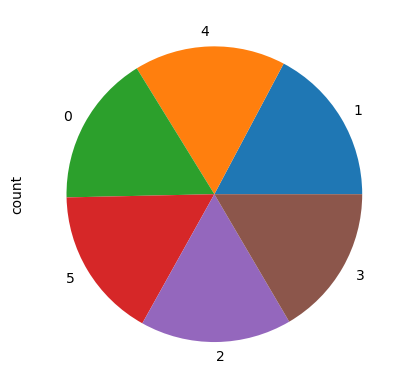

In [8]:
df.normality.value_counts().plot(kind="pie");
                                                  #Pie Chart representation of count of unique values in the target column

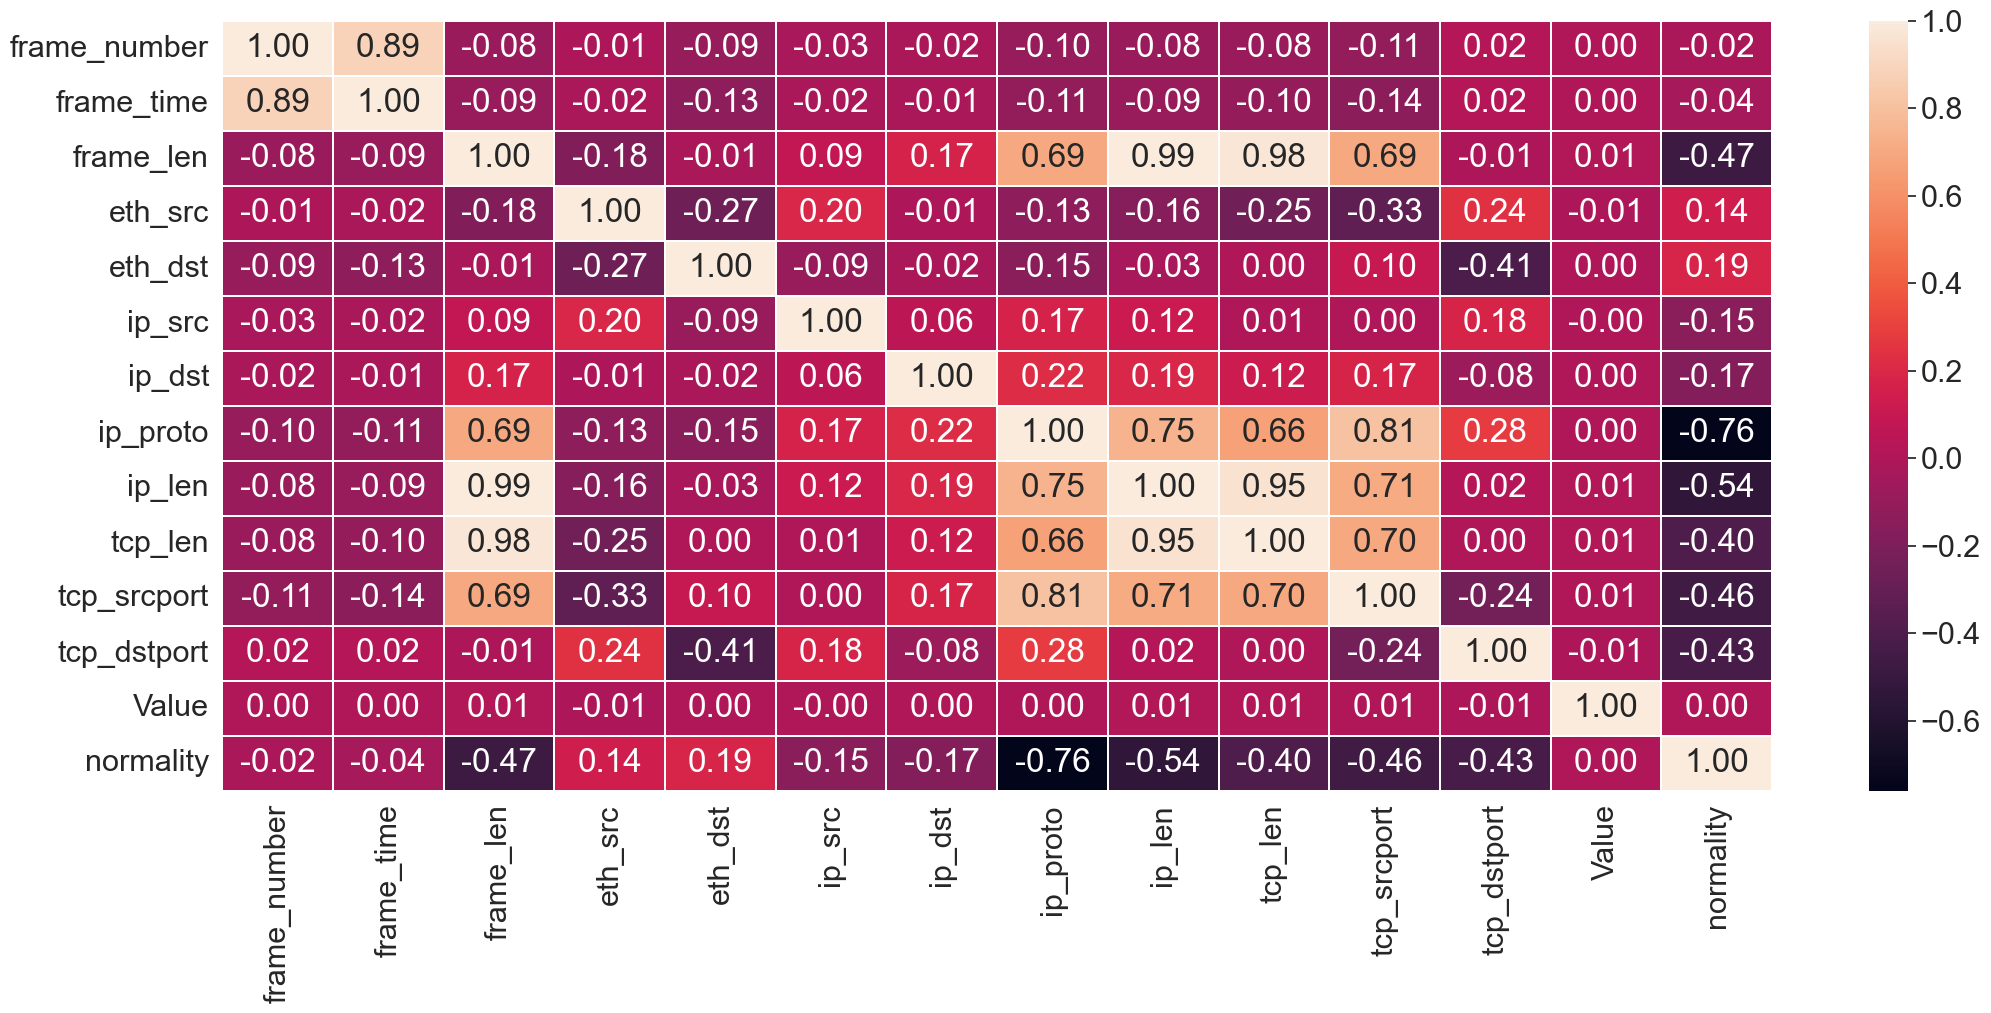

In [10]:
#Correlation matrix using seaborn
cross=df.corr()
sns.set(font_scale=2)
fig,ax = plt.subplots(figsize=(25,10))
ax = sns.heatmap(cross,
                  annot=True,
                  linewidths=0.2,
                fmt=".2f");


machine modelling

In [12]:
#splitting Train and Test data 
x = df.drop(columns = ['normality'])
y = df['normality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=11)


In [39]:
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x.shape


(95486, 13)
(381940,)
(95486,)


(477426, 13)

RandomForestClassifier()
Recall:  0.9999895272605408
Precision:  0.9999895272605408
Accuracy:  0.9999895272605408


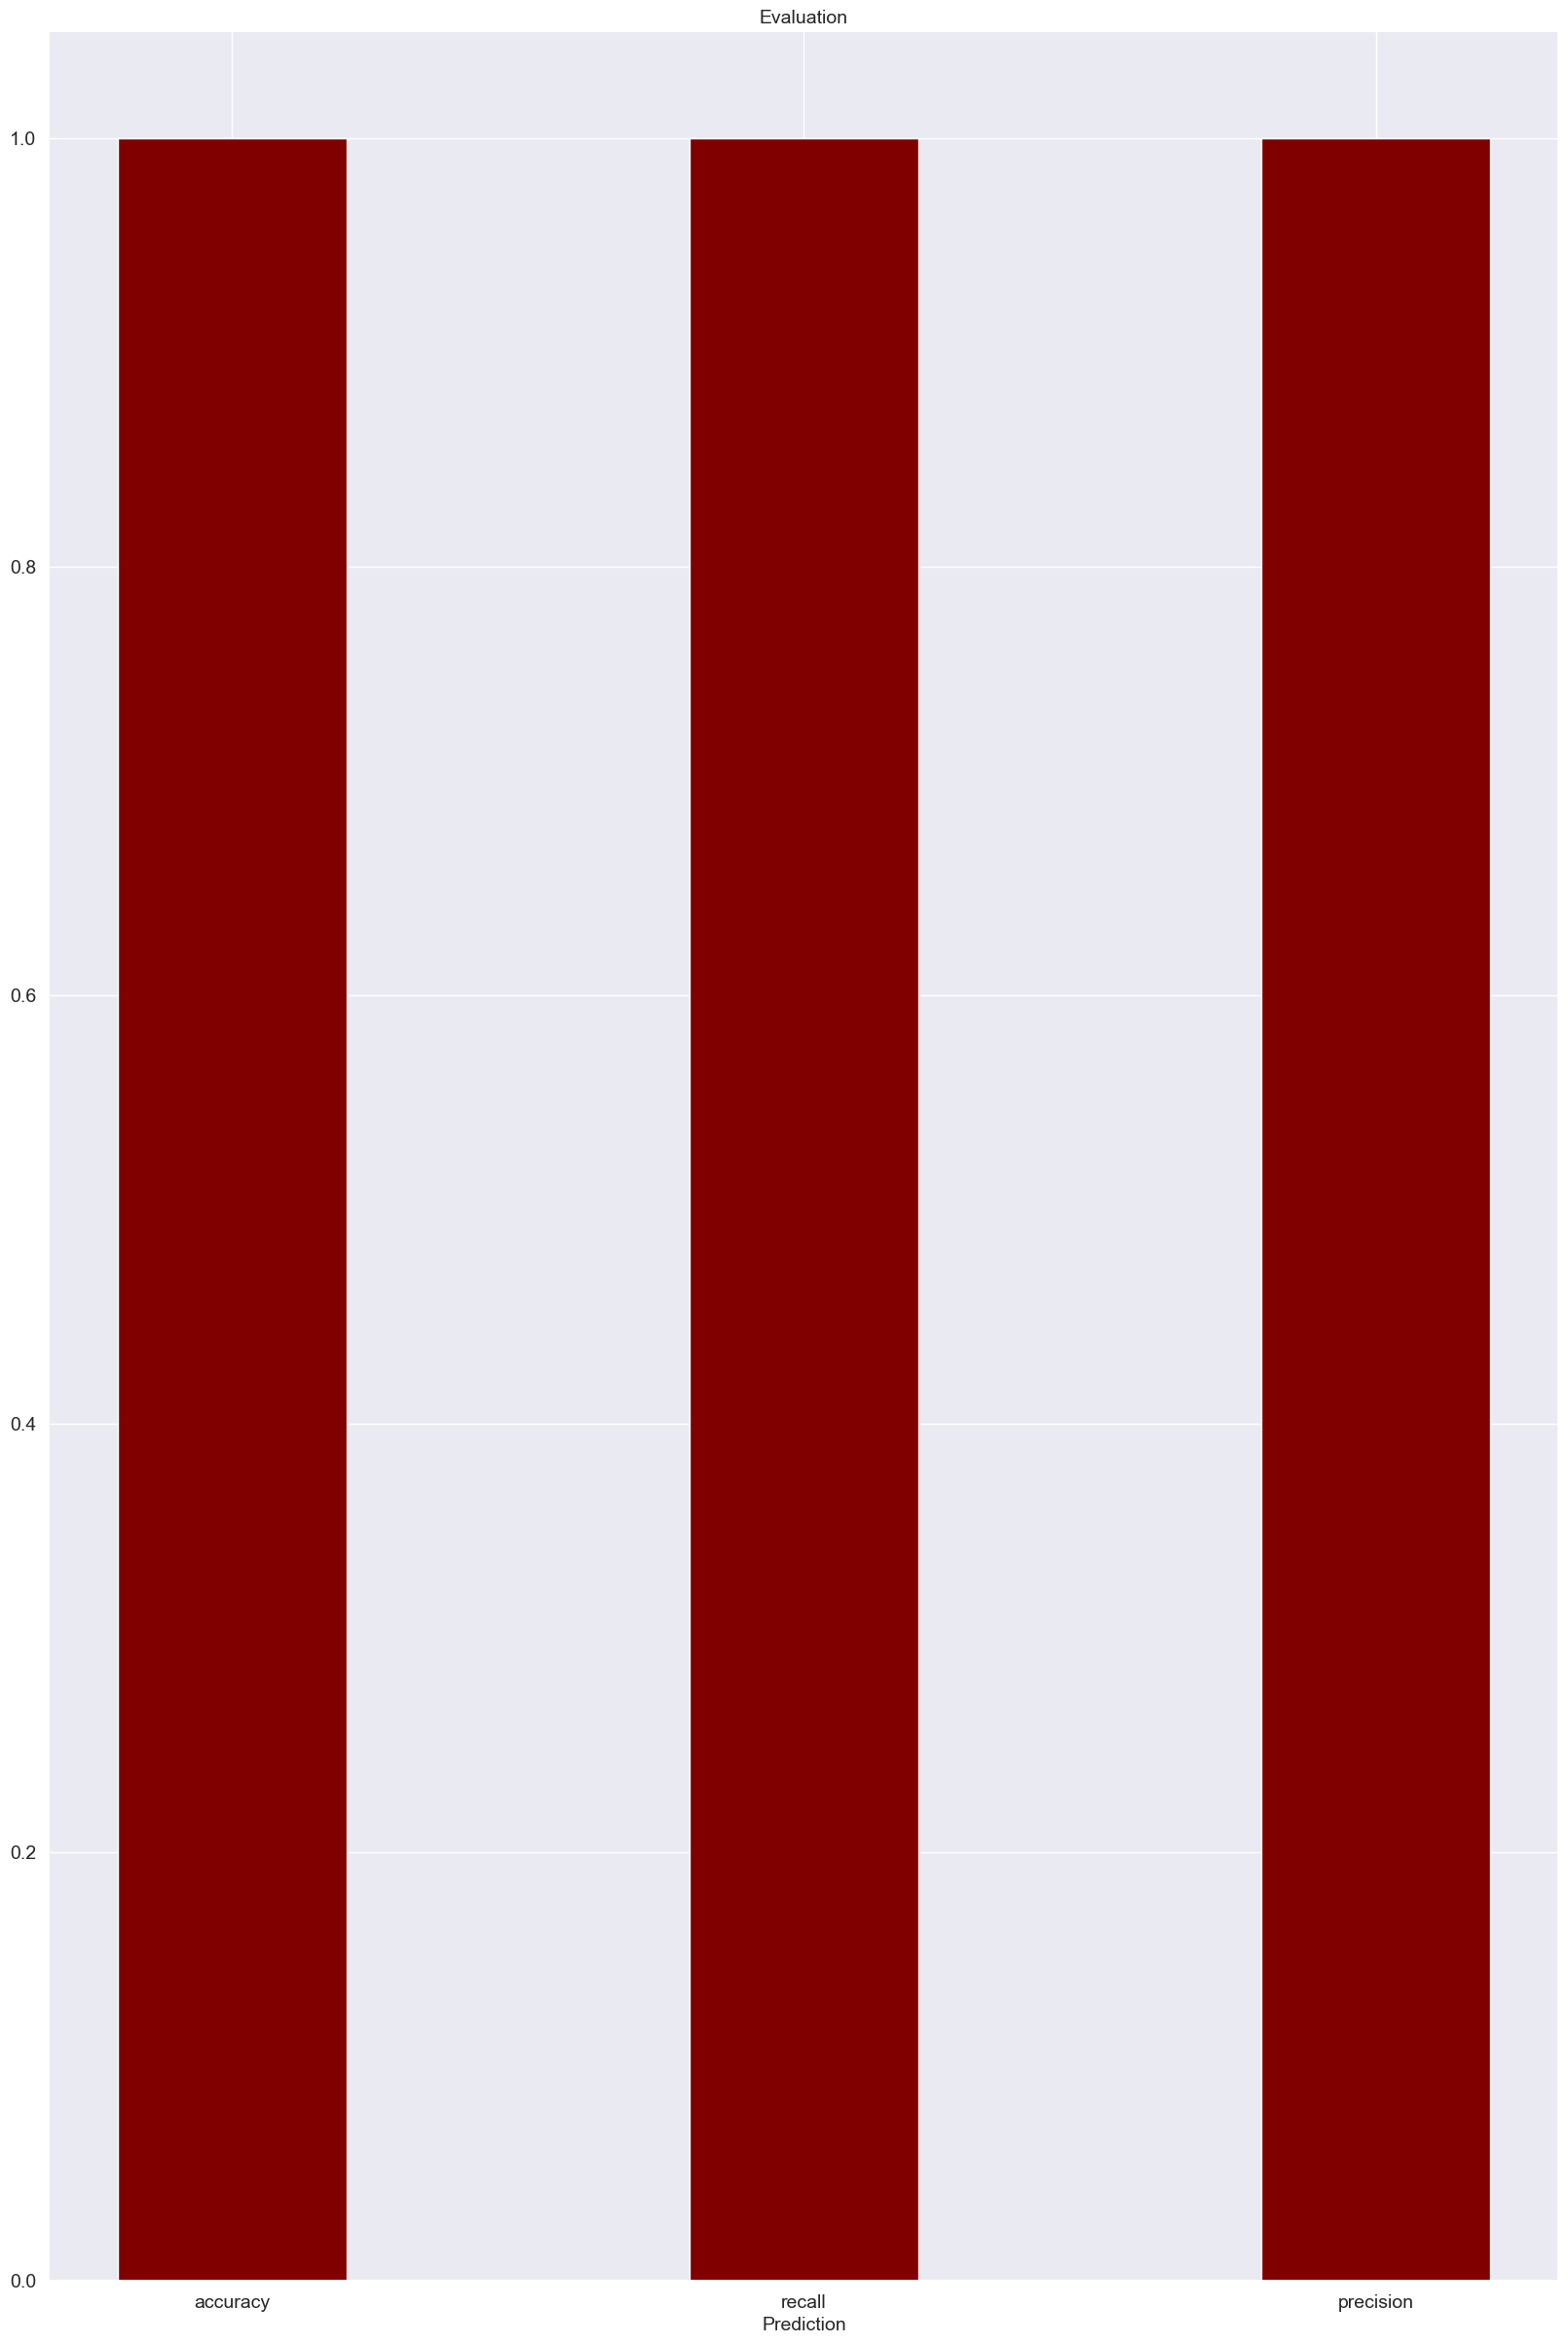

LogisticRegression(max_iter=10000, solver='liblinear')
Recall:  0.4076932744067193
Precision:  0.4076932744067193
Accuracy:  0.4076932744067193


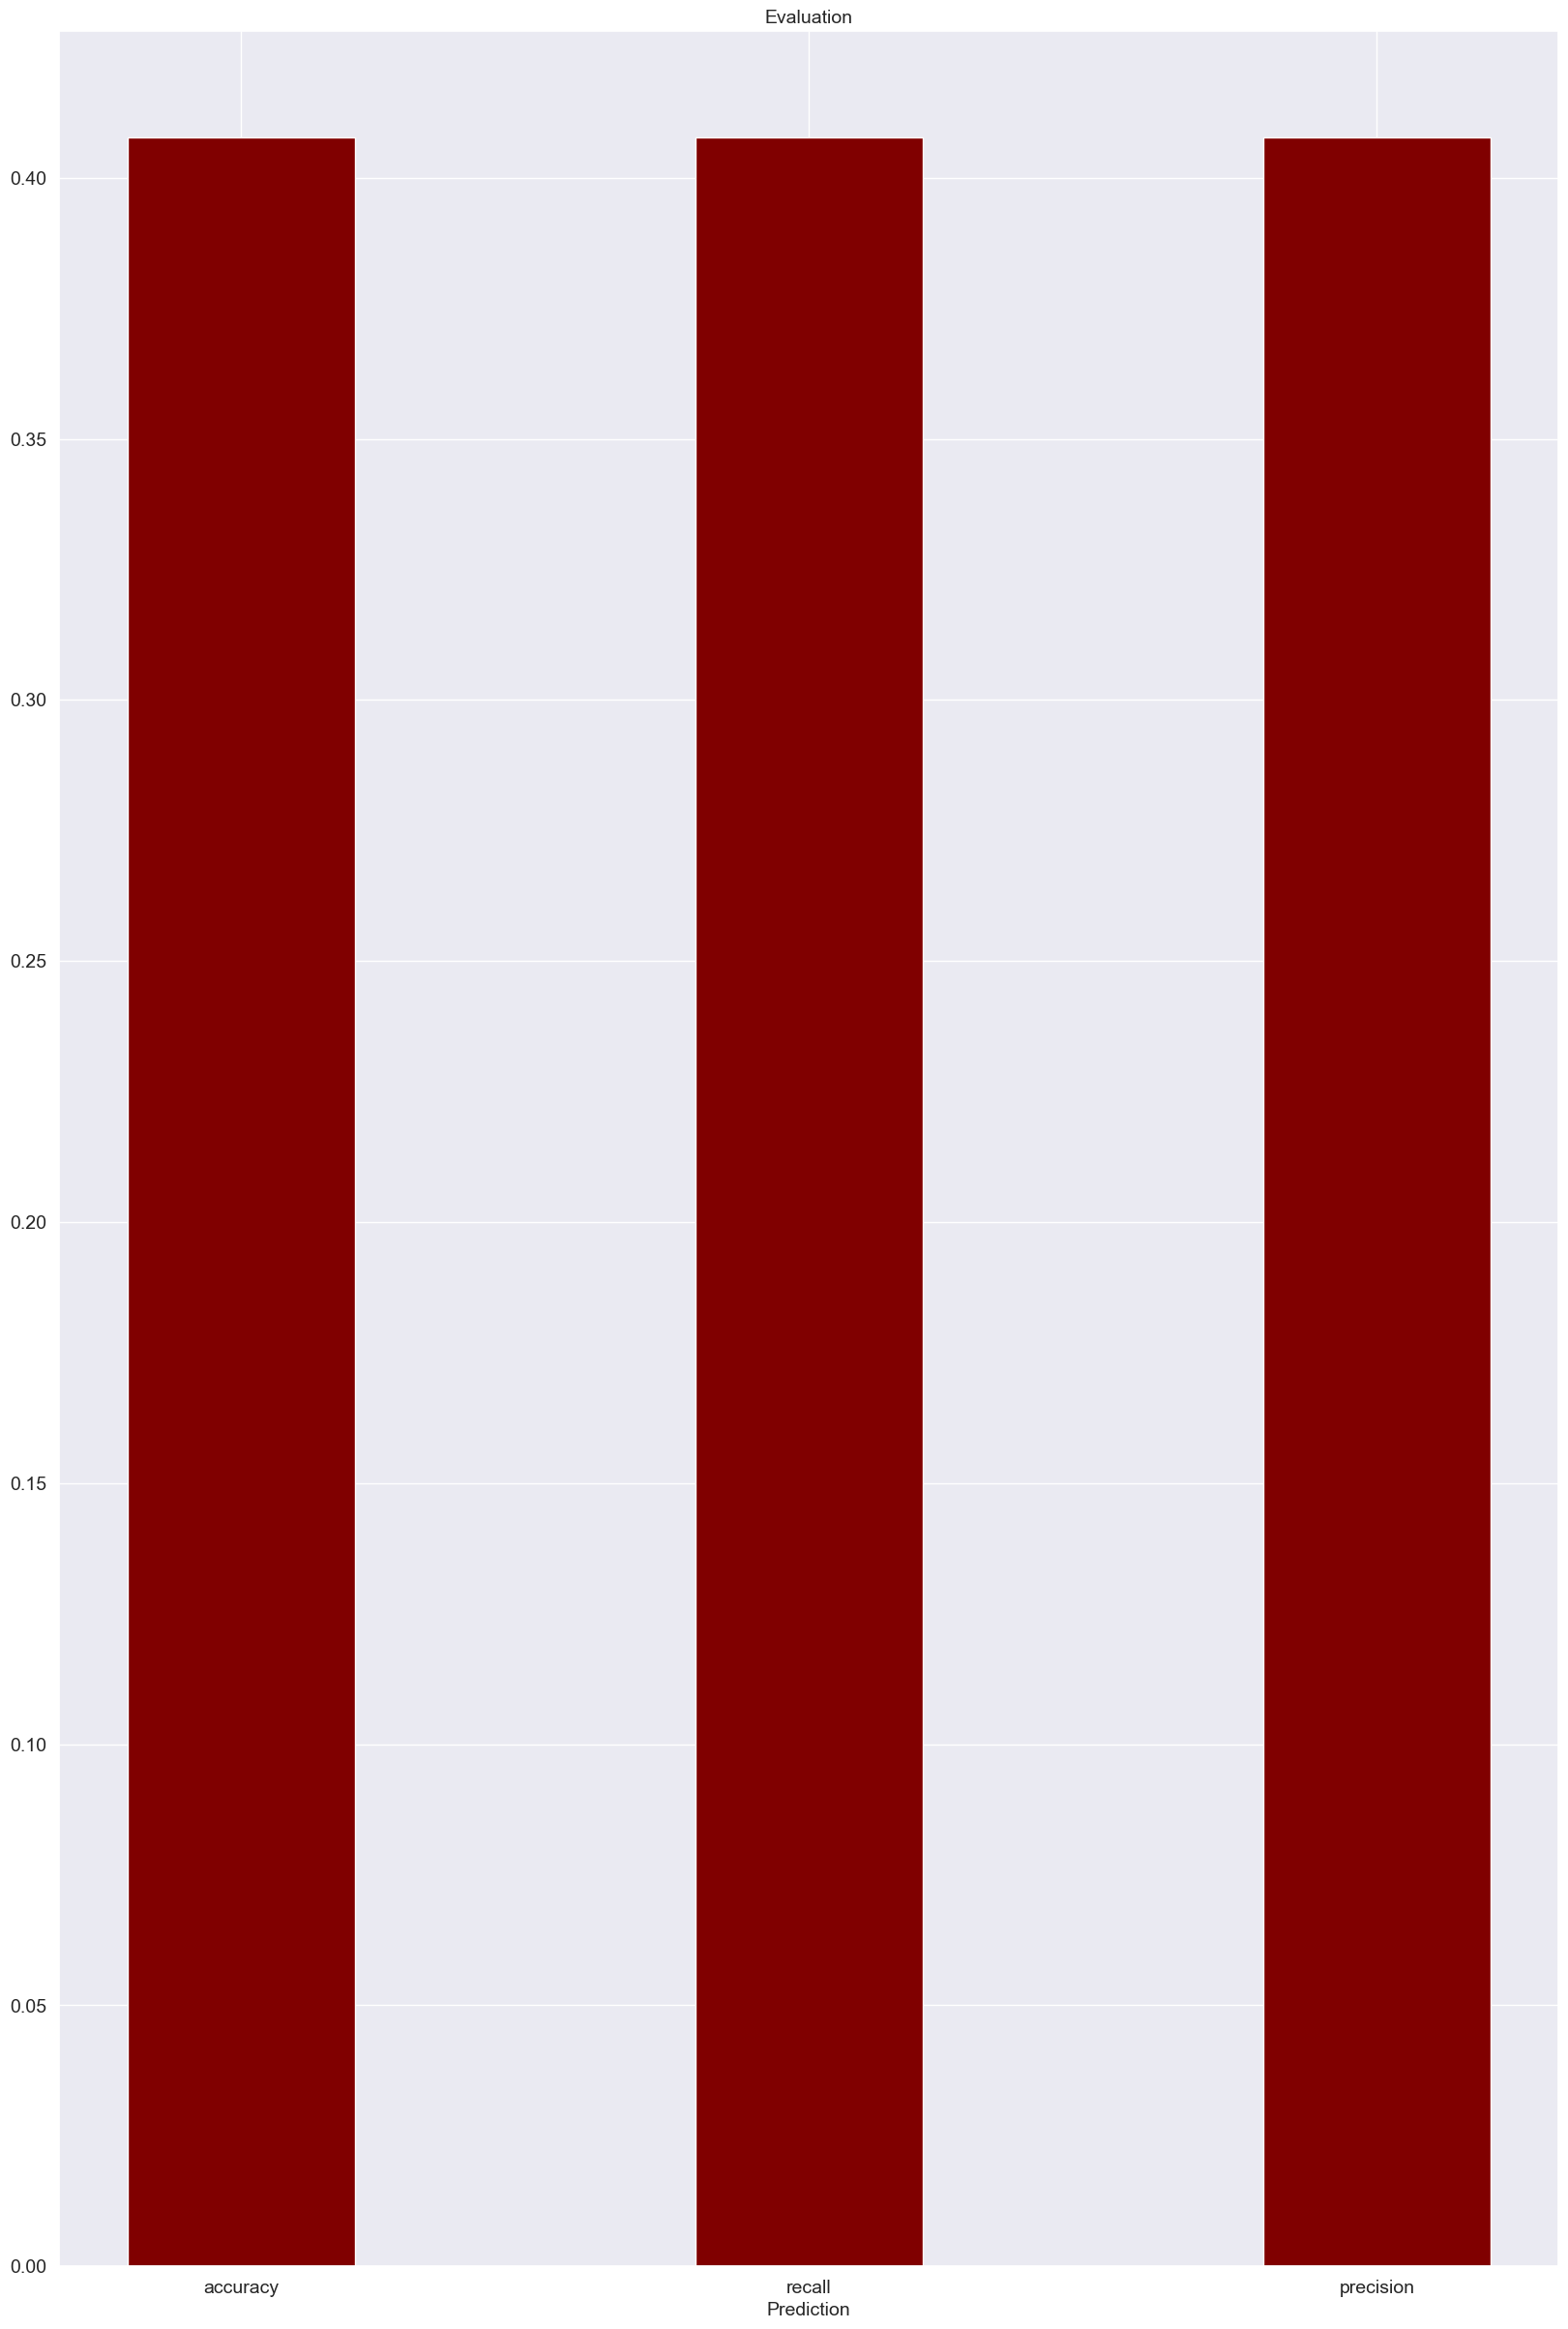

KNeighborsClassifier(n_neighbors=3)
Recall:  0.9831493622101669
Precision:  0.9831493622101669
Accuracy:  0.9831493622101669


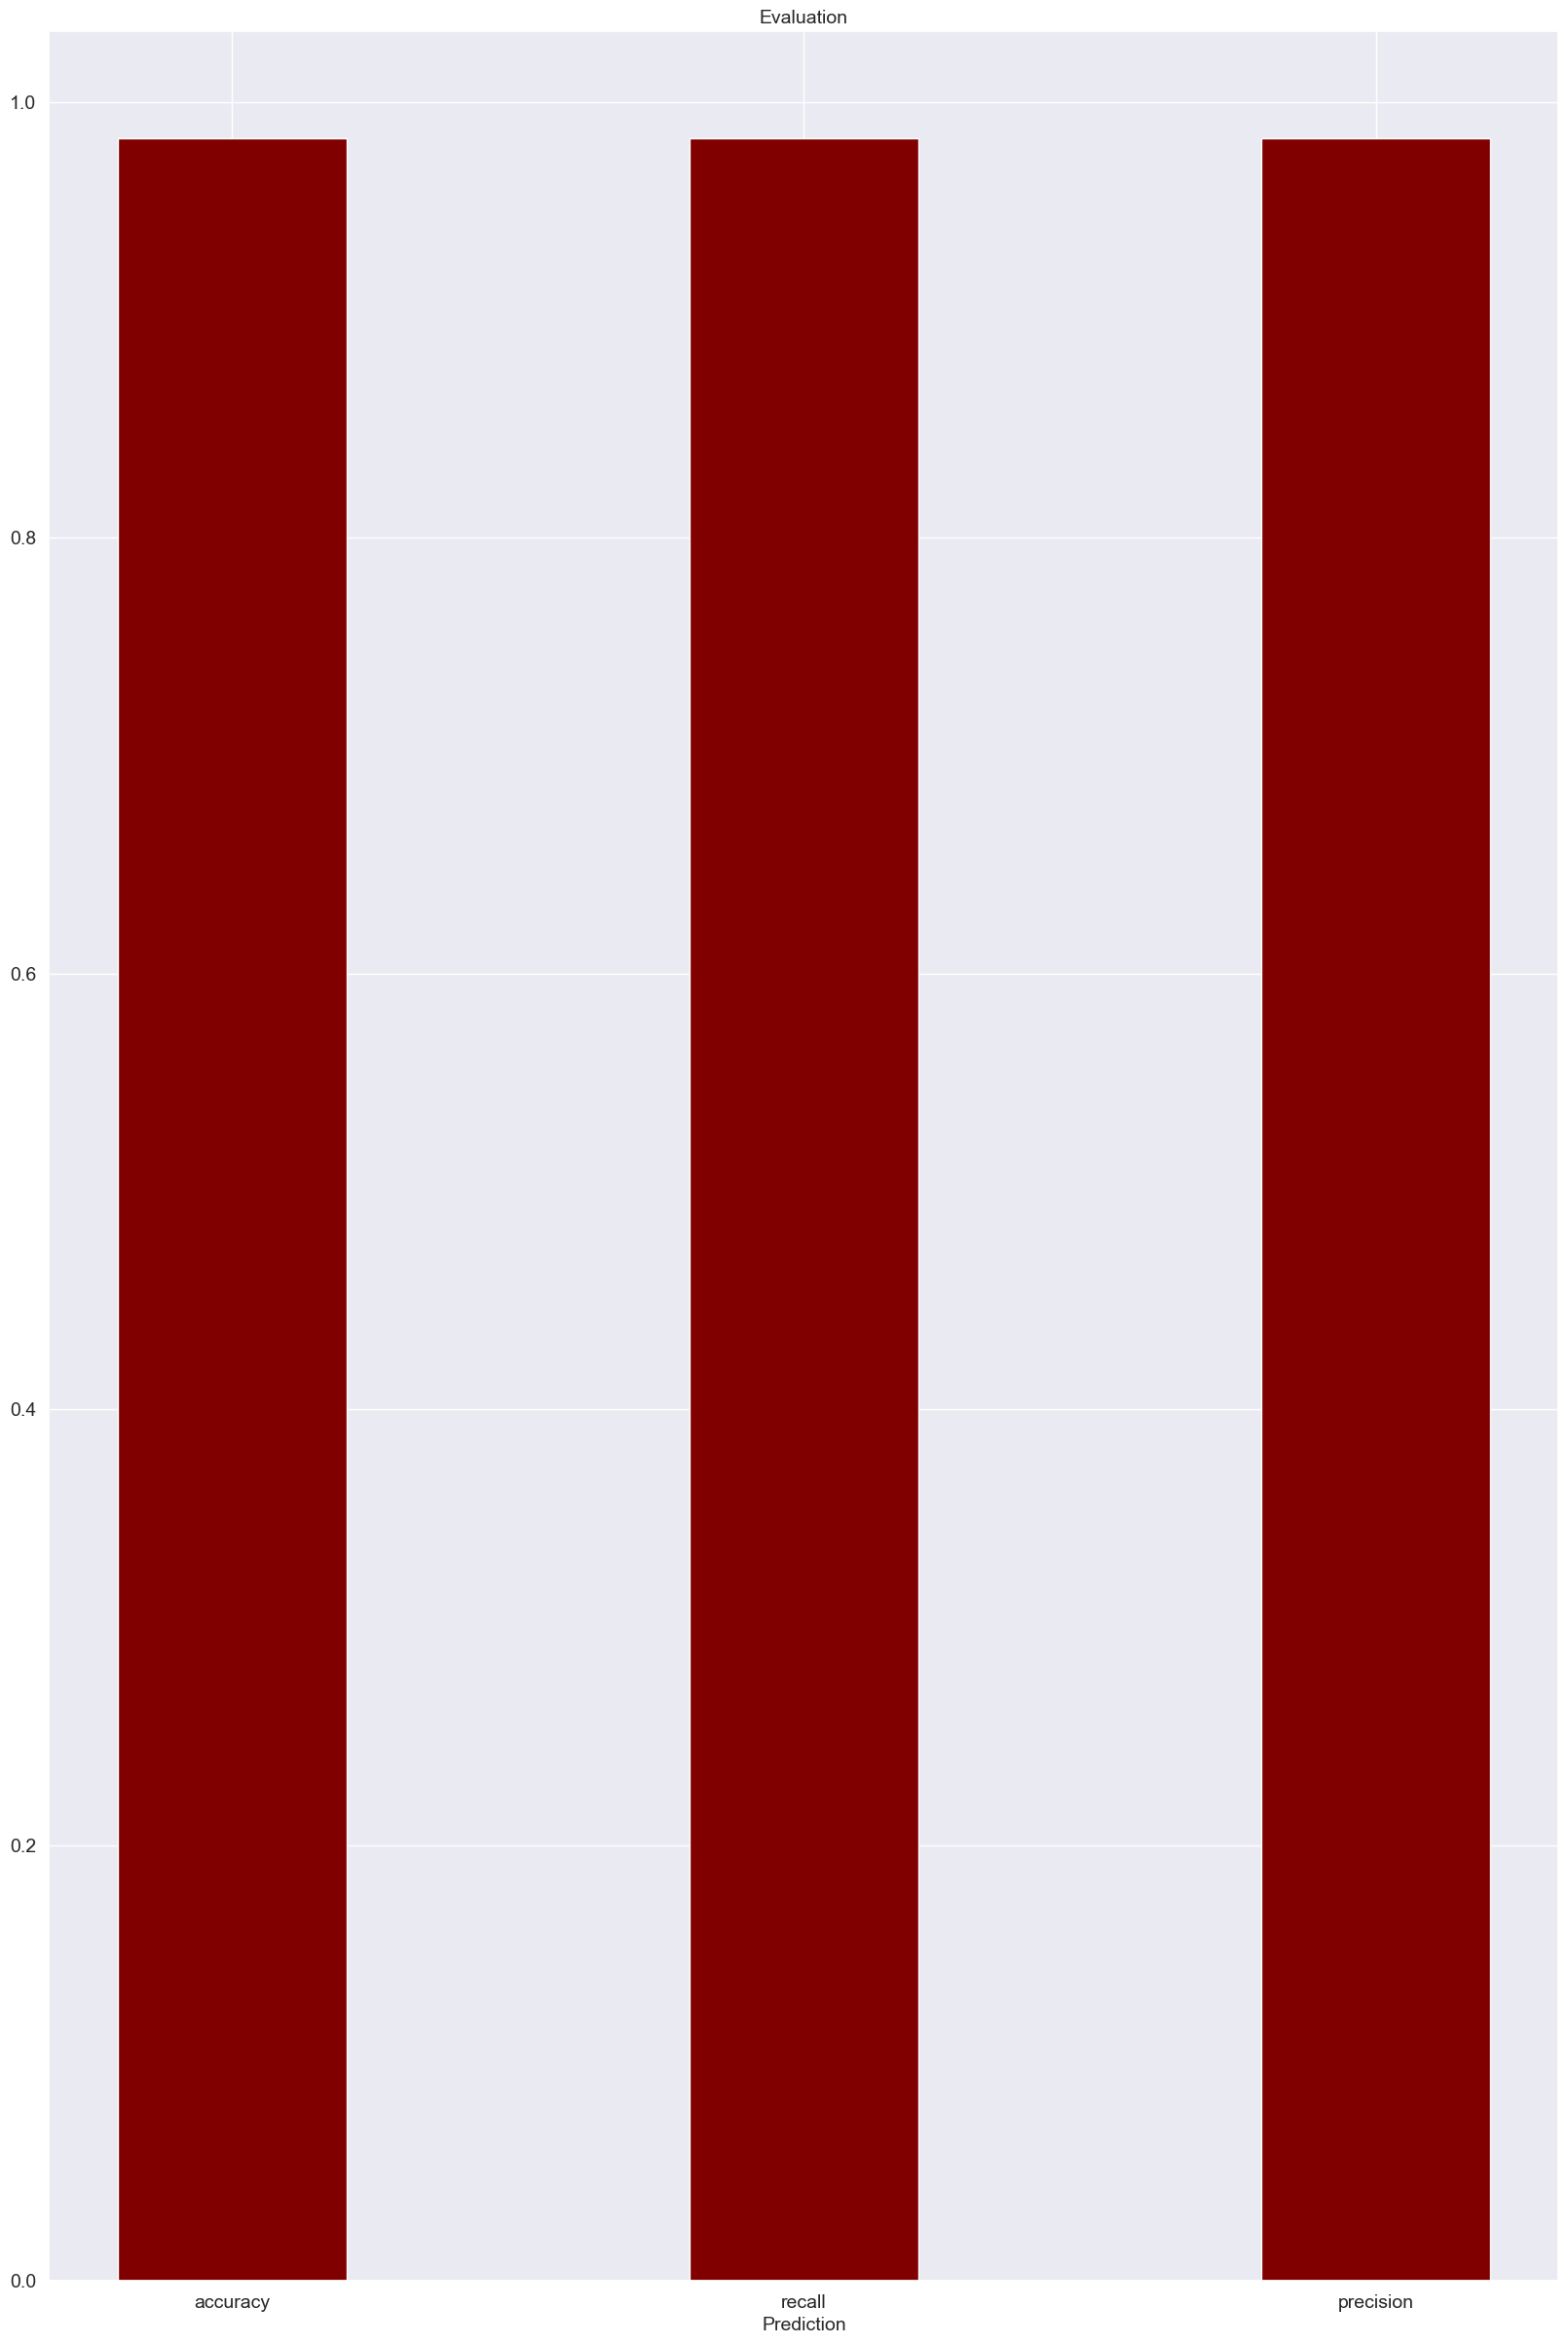

In [18]:
# Machine learning model with graphical representation
rf = RandomForestClassifier()
r=rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print(r)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy)
fig = plt.figure(figsize = (20,30))

# creating the bar plot
graph={"accuracy":accuracy,
       "recall":recall,
       "precision":precision}
g1=list(graph.keys())
g2=list(graph.values())

plt.bar(g1,g2,color ='maroon', 
        width = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Prediction",fontsize=14)
plt.title("Evaluation",fontsize=14)
plt.show()



lr = LogisticRegression(solver="liblinear",max_iter=10000)
l=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print(l)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy1)
fig = plt.figure(figsize = (20,30))

# creating the bar plot
graph={"accuracy":accuracy1,
       "recall":recall,
       "precision":precision}
g1=list(graph.keys())
g2=list(graph.values())

plt.bar(g1,g2,color ='maroon', 
        width = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Prediction",fontsize=14)
plt.title("Evaluation",fontsize=14)
plt.show()

kn= KNeighborsClassifier(n_neighbors=3)
k=kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print(k)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy2)
fig = plt.figure(figsize = (20,30))

# creating the bar plot
graph={"accuracy":accuracy2,
       "recall":recall,
       "precision":precision}
g1=list(graph.keys())
g2=list(graph.values())

plt.bar(g1,g2,color ='maroon', 
        width = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Prediction",fontsize=14)
plt.title("Evaluation",fontsize=14)
plt.show()

    
   
    


In [27]:

#Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV

In [14]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(x_train, y_train)
try:
    g_res.predict(x_test)
except NotFittedError as e:
    print(repr(e))


knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski') #minkowski uses vector
y_fit=knn.fit(x_train,y_train)
y_hat = knn.predict(x_train)
y_knn = knn.predict(x_test)
print(y_hat)
print(y_knn)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[1 5 1 ... 3 3 5]
[5 4 0 ... 5 3 2]


In [11]:
grid={"C":np.logspace(-4,4,20),                     
       "solver":["liblinear"]}                       
rf_grid={'n_estimators': [100,125,150,175,200,225,250], 
         'criterion': ['gini', 'entropy'], 
         'max_depth': [2,4,6,8,10], 
         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5], 
         'class_weight': [0.2,0.4,0.6,0.8,1.0],               
         'min_samples_split': [2,3,4,5,6,7]}
            

In [13]:
log=RandomizedSearchCV(LogisticRegression(),
                       param_distributions=grid,
                       n_iter=20,
                       cv=5,                      
                       verbose=3               
                       )
log.fit(x_train,y_train)
log.score(x_test,y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.411 total time=   7.2s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.410 total time=   6.3s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.408 total time=   6.1s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.410 total time=   6.2s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.408 total time=   6.2s
[CV 1/5] END C=0.00026366508987303583, solver=liblinear;, score=0.411 total time=   6.2s
[CV 2/5] END C=0.00026366508987303583, solver=liblinear;, score=0.410 total time=   6.3s
[CV 3/5] END C=0.00026366508987303583, solver=liblinear;, score=0.408 total time=   6.1s
[CV 4/5] END C=0.00026366508987303583, solver=liblinear;, score=0.410 total time=   6.2s
[CV 5/5] END C=0.00026366508987303583, solver=liblinear;, score=0.408 total time=   6.2s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.411 total time=   6.2s


[CV 2/5] END .......C=10000.0, solver=liblinear;, score=0.410 total time=   6.3s
[CV 3/5] END .......C=10000.0, solver=liblinear;, score=0.408 total time=   6.1s
[CV 4/5] END .......C=10000.0, solver=liblinear;, score=0.410 total time=   6.3s
[CV 5/5] END .......C=10000.0, solver=liblinear;, score=0.408 total time=   6.3s


0.4076932744067193

In [25]:
y_preds=rf.predict(x_test)


In [26]:
y_preds

array([5, 4, 1, ..., 5, 3, 2], dtype=int64)

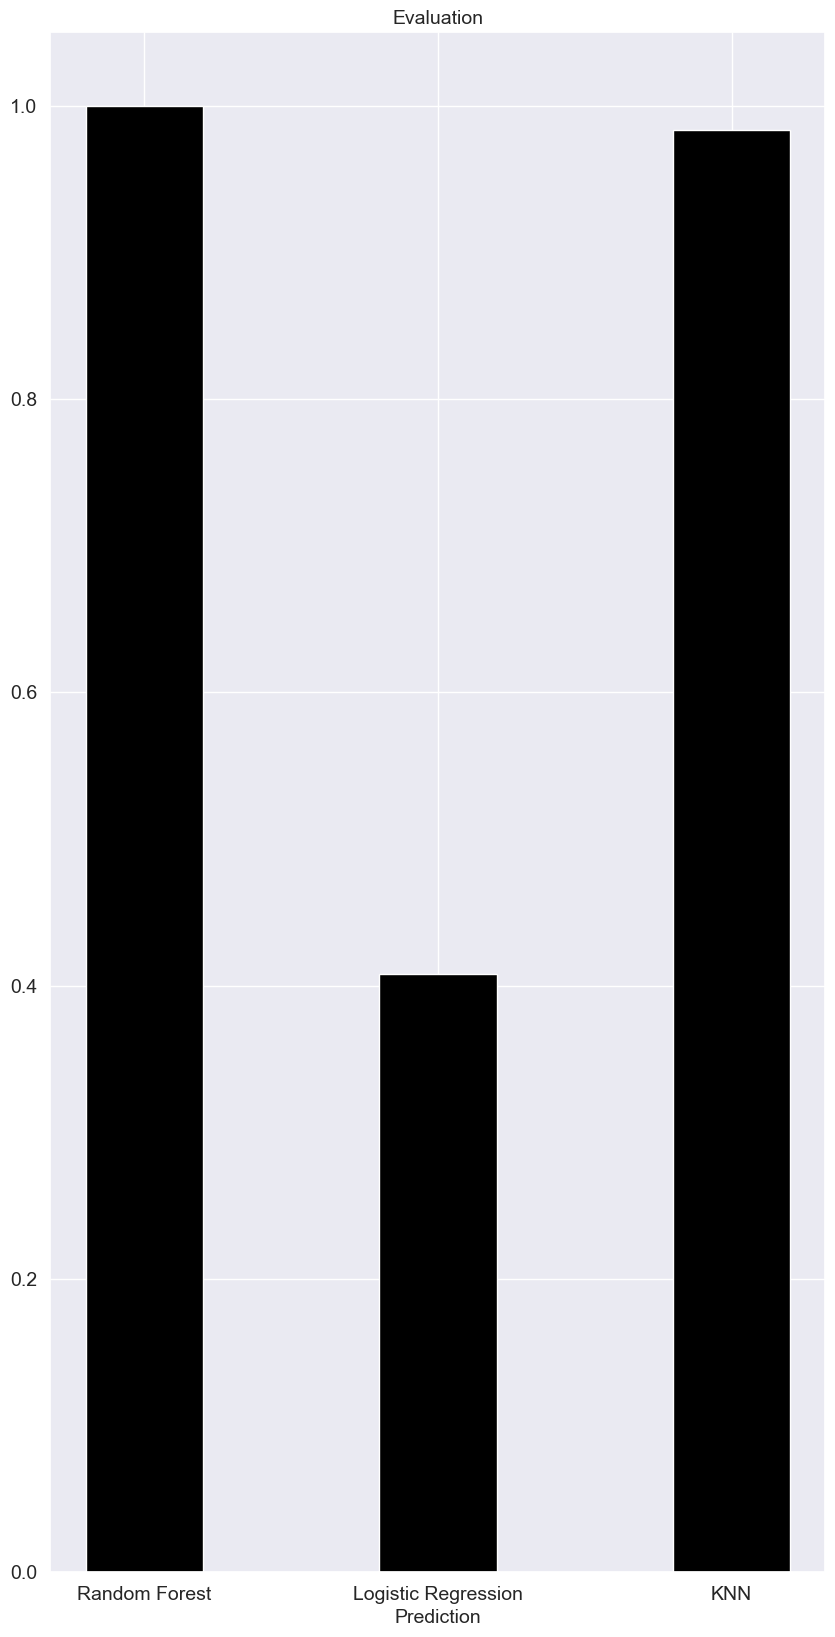

In [22]:
# Grpahical visualization of each machine learning models for finding the model with better accuracy 
fig = plt.figure(figsize = (10,20))

# creating the bar plot
graph={"Random Forest":accuracy,
       "Logistic Regression":accuracy1,
       "KNN":accuracy2}
g1= list(graph.keys())
g2= list(graph.values())

plt.bar(g1,g2,color ='black', 
        width = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Prediction",fontsize=14)
plt.title("Evaluation",fontsize=14)
plt.show()
 

RANDOM FOREST HAS BETTER ACCURACY (99.99)

In [30]:
# Confusion Matrix to find False positives, False negatives, True Positives, True Negatives
sns.set(font_scale=30)
fig,ax=plt.subplots(figsize=(300,300))
sns.heatmap(confusion_matrix(y_test,y_preds),
           annot=True,
           linewidths=0.5) 


<AxesSubplot:>

In [31]:
# Classification report
print(classification_report(y_test,y_preds))                   
                                                               

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15768
           1       1.00      1.00      1.00     16321
           2       1.00      1.00      1.00     15738
           3       1.00      1.00      1.00     15530
           4       1.00      1.00      1.00     16088
           5       1.00      1.00      1.00     16041

    accuracy                           1.00     95486
   macro avg       1.00      1.00      1.00     95486
weighted avg       1.00      1.00      1.00     95486

